**Ironhack Final Project**

---

**Notebook 01 - EDA for GBD19 data**

---

**Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tools.visualization as vis

# maps
# import folium
# from folium import Choropleth, Circle, Marker, Icon, Map, TileLayer
import plotly.express as px
import json

# Visualization mantra
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context('poster')
sns.set(rc={'figure.figsize': (5, 5)})
sns.set_style('whitegrid')
# sns.set_style("whitegrid", {'axes.grid' : False})

---

# GBD19: Europe (1990-2019)
**Number of deaths caused by COPD and Breast cancer in Europe**

In [2]:
# Importing
disease = pd.read_csv('../data/GBD19/disease/IHME-GBD_2019_DATA-COPD-BREASTCANCER.csv') # No missing values

In [3]:
# Reorganizing
disease = disease[['location_name','cause_name','metric_name','year','val','upper','lower']] # Subset
disease = disease.sort_values(by=['location_name','year','cause_name'], ascending = True) # Sort by country

In [4]:
# Changing names to match geojson
disease['location_name'] = disease['location_name'].str.replace('Russian Federation','Russia')
disease['location_name'] = disease['location_name'].str.replace('Bosnia and Herzegovina','Bosnia and Herz.')

In [5]:
# In the end deleting Russia
disease = disease[disease['location_name']!='Russia']

In [6]:
# Exporting
disease.to_csv('../data/GBD19/disease/IHME-GBD_2019_DATA-COPD-BREASTCANCER_clean.csv', index = False)

## COPD
**Clean dataframe for COPD**

In [7]:
# Selecting only COPD disease, focusing on Percent deaths and renaming columns
gbd19_copd = disease.copy()
gbd19_copd = gbd19_copd[gbd19_copd['metric_name']=='Percent']
gbd19_copd = gbd19_copd[gbd19_copd['cause_name']=='Chronic obstructive pulmonary disease']
gbd19_copd = gbd19_copd.rename(columns={'location_name': 'Location','cause_name': 'Disease', 'year':'Year', 'val':'Percent deaths'})
gbd19_copd = gbd19_copd[['Location', 'Year','Percent deaths','upper','lower']]
# Exporting
gbd19_copd.to_csv('../data/GBD19/disease/gbd19_copd.csv', index = False)

**Plot**

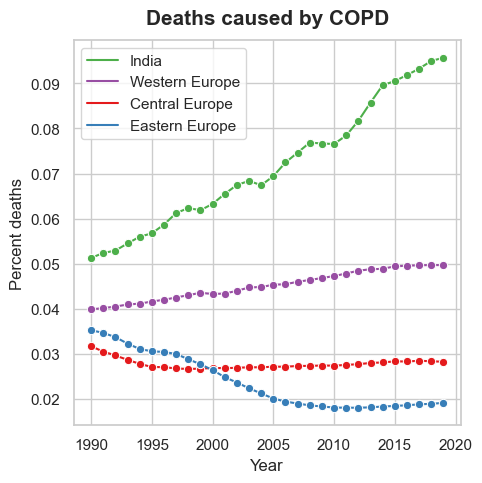

In [8]:
location_subset = ['Eastern Europe','Central Europe','Western Europe','India']
order_legend = [2, 3, 0, 1]
title = "Deaths caused by COPD"
fig = vis.plot_lineplot(gbd19_copd, location_subset, 'Year', 'Percent deaths', order_legend, title)
plt.savefig(f"./output/global/deaths_COPD_europe.jpg", dpi=1000, bbox_inches='tight') 
plt.show()

## Breast cancer
**Clean dataframe for Breast cancer**

In [9]:
# Selecting only Breast cancer disease, focusing on Percent deaths and renaming columns
gbd19_brcancer = disease.copy()
gbd19_brcancer = gbd19_brcancer[gbd19_brcancer['metric_name']=='Percent']
gbd19_brcancer = gbd19_brcancer[gbd19_brcancer['cause_name']=='Breast cancer']
gbd19_brcancer = gbd19_brcancer.rename(columns={'location_name': 'Location','cause_name': 'Disease', 'year':'Year', 'val':'Percent deaths'})
gbd19_brcancer = gbd19_brcancer[['Location', 'Year','Percent deaths','upper','lower']]
# Exporting
gbd19_brcancer.to_csv('../data/GBD19/disease/gbd19_brcancer.csv', index = False)

**Plot**

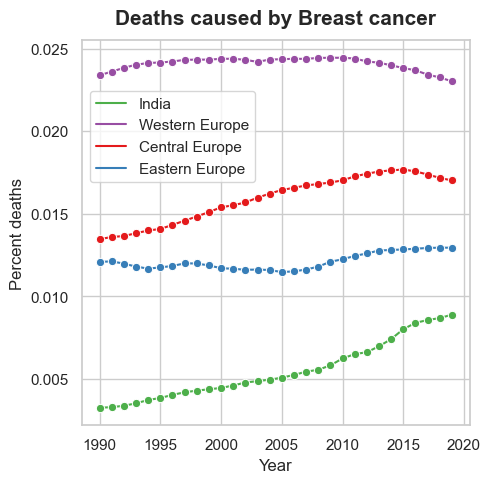

In [10]:
location_subset = ['Eastern Europe','Central Europe','Western Europe','India']
order_legend = [2,3,0,1]
title = "Deaths caused by Breast cancer"
fig = vis.plot_lineplot(gbd19_brcancer, location_subset, 'Year', 'Percent deaths', order_legend, title)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[i] for i in order_legend], [labels[i] for i in order_legend],loc="center left", bbox_to_anchor=(0, 0.5, 0.5, 0.5))
plt.savefig(f"./output/global/deaths_breastcancer_europe.jpg", dpi=1000, bbox_inches='tight') 
plt.show()

## PM in Europe (1990-2019)

In [11]:
# Importing
pm = pd.read_csv('../data/GBD19/pm/GBD_AIR_POLLUTION_1990_2019.csv') # No missing values

In [12]:
# Filtering
list_countries = disease['location_name'].unique()
pm = pm[pm['location_name'].isin(list_countries)] # subset countries, only the ones that exist in the disease dataset
pm = pm[['location_name','rei_name','year_id','mean','median','upper','lower']] # subset columns
pm = pm.sort_values(by=['location_name','year_id']) # sort by country and year

In [13]:
# Rename to match geojson
pm['location_name'] = pm['location_name'].str.replace('Russian Federation','Russia')
pm['location_name'] = pm['location_name'].str.replace('Bosnia and Herzegovina','Bosnia and Herz.')
# Rename columns
pm = pm.rename(columns={'location_name': 'Location','rei_name': 'Pollutant', 'year_id':'Year', 'mean':'Mean_concentration'})

In [14]:
# Exporting
pm.to_csv('../data/GBD19/pm/GBD_AIR_POLLUTION_1990_2019_clean.csv', index = False)

**Plot**

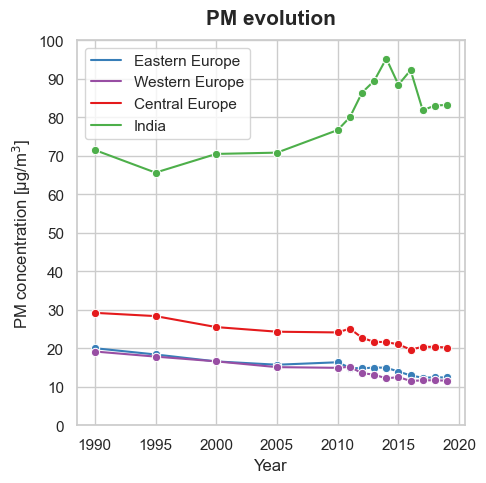

In [15]:
location_subset = ['Eastern Europe','Central Europe','Western Europe','India']
order_legend = [1, 3, 0, 2]
title = "PM evolution"
fig = vis.plot_lineplot(pm, location_subset, 'Year', 'Mean_concentration', order_legend, title)
plt.ylabel("PM concentration [µg/m$^3$]")
plt.yticks(np.arange(0, 110, 10))
plt.savefig(f"./output/global/pm_europe.jpg", dpi=1000, bbox_inches='tight') 
plt.show()

# Geojson

In [16]:
# Load geo_json
with open("../data/map/europe.json", encoding='utf-8') as geo_file:
    geo_europe = json.load(geo_file)

In [17]:
# Get the list of the countries' names
geo_countries = []
for i in range(len(geo_europe["features"])):
    geo_countries.append(geo_europe["features"][i]["properties"]["name"])

In [18]:
# Check which cities are not included
a_list = []
for i in geo_countries:
    if i not in list_countries:
        a_list.append(i)
print(a_list)

['Russia', 'Kosovo', 'Liechtenstein', 'Moldova', 'Vatican', 'Jersey', 'Guernsey', 'Isle of Man', 'Åland', 'Faeroe Is.']


## Plotting PM

In [19]:
# the_range = [0,50]
# fig = vis.plot_map(pm, geo_europe, "Location", "Mean_concentration", "Year", "sunset", the_range)
# fig.write_html('./output/global/copd.html')
# fig.show()

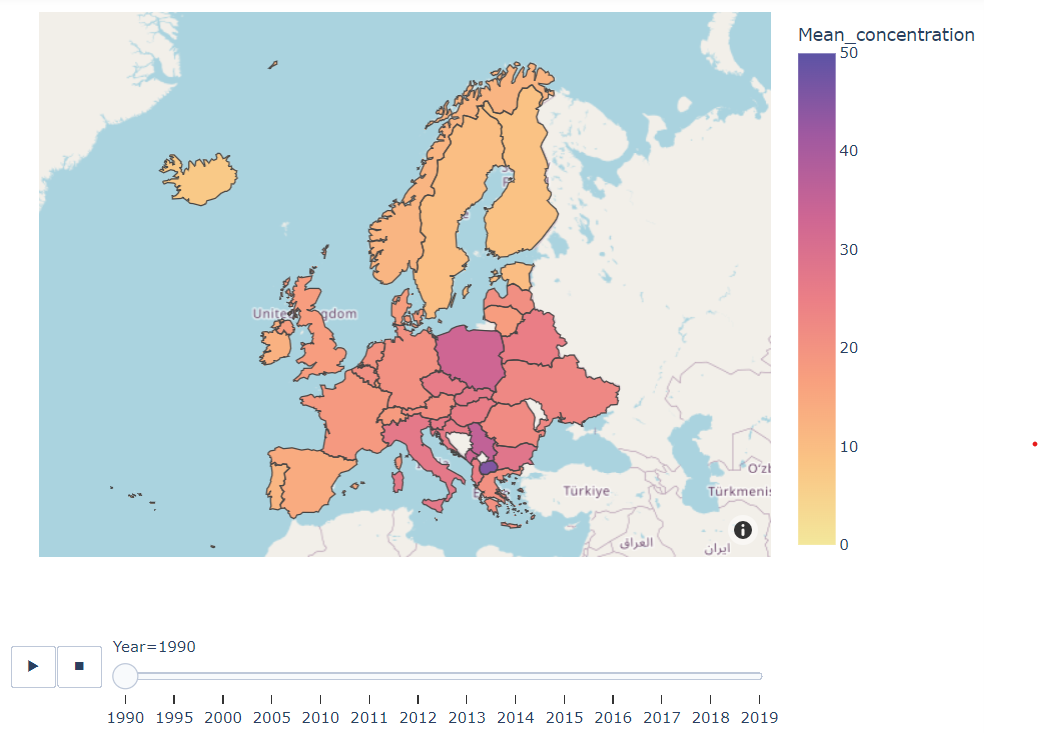

## Plotting disease

In [ ]:
# the_range = [0, 0.08]
# fig = vis.plot_map(gbd19_copd, geo_europe, "Location", "Percent deaths", "Year", "sunset", the_range)
# fig.write_html('./output/global/copd.html')
# fig.show()

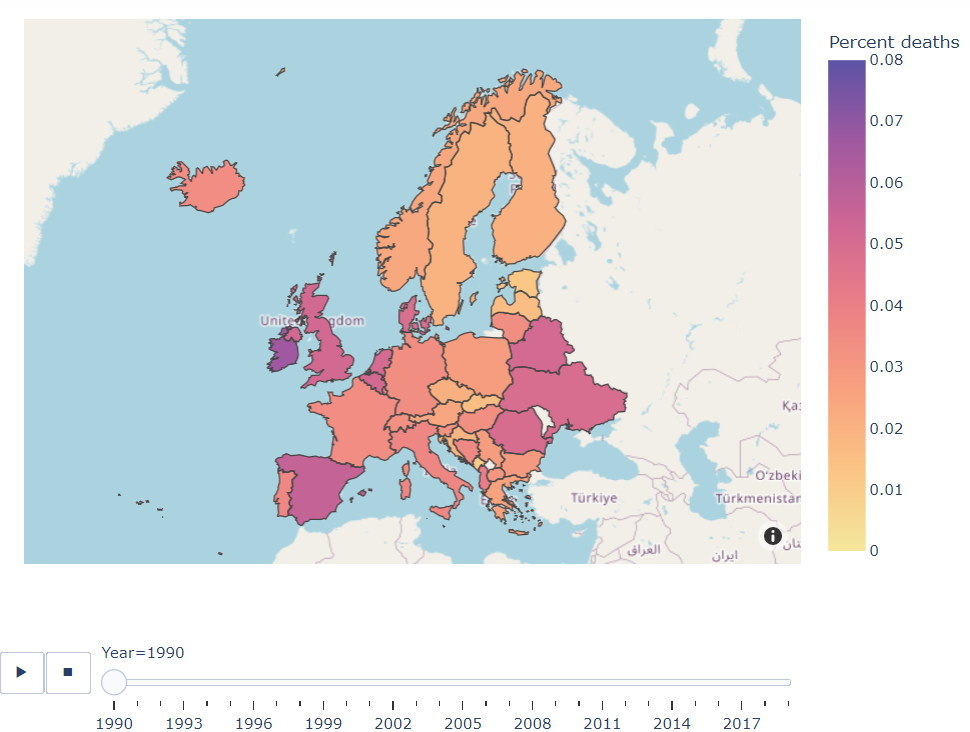